In [21]:
# For making Jupyter play nice with Pip
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt 

# for Confusion Matrix
from sklearn.metrics import confusion_matrix

In [26]:
# Create confusion matrix given predicted and true data:
# Based  on metakermit's answer from here: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

def get_confusionMatrix(predicted, true_data, labels):
    # arg labels is a string vector. e.g ['class1','class2']
    
    
    cm = confusion_matrix(true_data, predicted, labels)
    
    return cm

In [23]:
# Confusion Matrix:
# Based on akilat90's answer, also from here https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

    

def confuseMe(confusion_matrix):
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);
    return

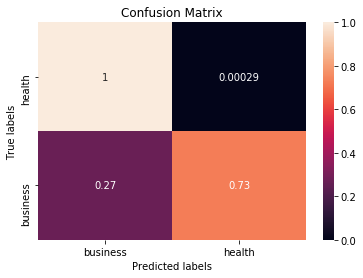

In [20]:
cm = get_confusionMatrix()

In [28]:
def getChannels_unraveled(img,channels):
    # import images (will be in bgr because of cv2)
    img_bgr = cv2.imread(img)

    if(channels=='rgb'):
    # get r,g, and b of img_bgr:
        img_r = np.ravel(img_bgr[:,:,2])
        img_g = np.ravel(img_bgr[:,:,1])
        img_b = np.ravel(img_bgr[:,:,0])
       
        data = np.stack((img_r,img_g,img_b))
        return(data)
    elif(channels=='hsv'):
        # convert img_bgr to HSV:
        img_hsv = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)

        # get H, S and V of img_hsv
        img_H = np.ravel(img_hsv[:,:,0])
        img_S = np.ravel(img_hsv[:,:,1])
        img_V = np.ravel(img_hsv[:,:,2])

        data = np.stack((img_H,img_S,img_V))
        return(data)

In [29]:
def component_distributions(K, test_image,colour_space, λc, μc, Σc, λd, μd, Σd):
    # K = number of gaussians
    # λc, μc, Σc, λd, μd, Σd are the coin and desk parameters respectively.
    
    img = getChannels_unraveled(test_image, colour_space)
    print(img,img.shape)
#     h = test_hsv[:,:,0]
#     s = test_hsv[:,:,1]
#     v = test_hsv[:,:,2]
    
#     test_data = np.stack([np.ravel(h), np.ravel(s), np.ravel(v)]).T
    
    mix_means = np.zeros((2*mixtures, test_data.shape[0]))
    
    for k in np.arange(mixtures):
        mix_means[k,:] = λc[k] * stats.multivariate_normal.pdf(test_data, μc[k], Σc[k])
        mix_means[k+mixtures,:] = λd[k] * stats.multivariate_normal.pdf(test_data, μd[k], Σd[k])
    
    kmeans = np.argmax(mix_means, axis=0)
    
#     all_means = np.vstack([μc, μd])
    new_img=kmeans.reshape((im.shape[0],im.shape[1]))
    from numpy.ma import masked_array
    v1a = masked_array(new_img,new_img<mixtures) - 10
    v1b = masked_array(new_img,new_img>=mixtures) 
    fig,ax = plt.subplots(figsize=(12,12))
    pa = ax.imshow(v1a,interpolation='nearest',cmap="autumn")
    cba = plt.colorbar(pa,shrink=0.5)
    pb = ax.imshow(v1b,interpolation='nearest',cmap="winter")
    cbb = plt.colorbar(pb,shrink=0.5)
    cba.set_label('desk')
    cbb.set_label('coin')
    plt.show()
